<a href="https://colab.research.google.com/github/Aartizikre150/Datacamp/blob/main/Analyzing_Survey_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Survey Data in Python

In [ ]:
4

Crosstabulation

In [ ]:
# Create a cross-tabulation of "Gender" and "Education"
cross_tabulation = pd.crosstab(we_survey.Gender,
                               we_survey.Education,
                               margins = True)
print(cross_tabulation)

Descriptive statistics

In [ ]:
# Generate descriptive statistics on the non-numerical columns
print(youth_survey_clean.describe(include = np.object))

Inferential statistics

In [ ]:
# Find confidence interval for mean height with 95% confidence level
conf_95 = st.norm.interval(alpha = 0.95,
                           loc = np.mean(youth_survey_clean.Height_in),
                           scale = st.sem(youth_survey_clean.Height_in))

# Find confidence interval for mean height with 99% confidence level
conf_99 = st.norm.interval(alpha = 0.99,
                           loc = np.mean(youth_survey_clean.Height_in),
                           scale = st.sem(youth_survey_clean.Height_in))
print("conf_95 = ", conf_95)
print("conf_99 = ", conf_99)

Scatter plot inspection


In [ ]:
# Create a scatter plot between `Age` and `Height_in`
youth_survey.plot.scatter(x='Age',y='Height_in')
plt.show()

Choose a statistical method


In [ ]:
3

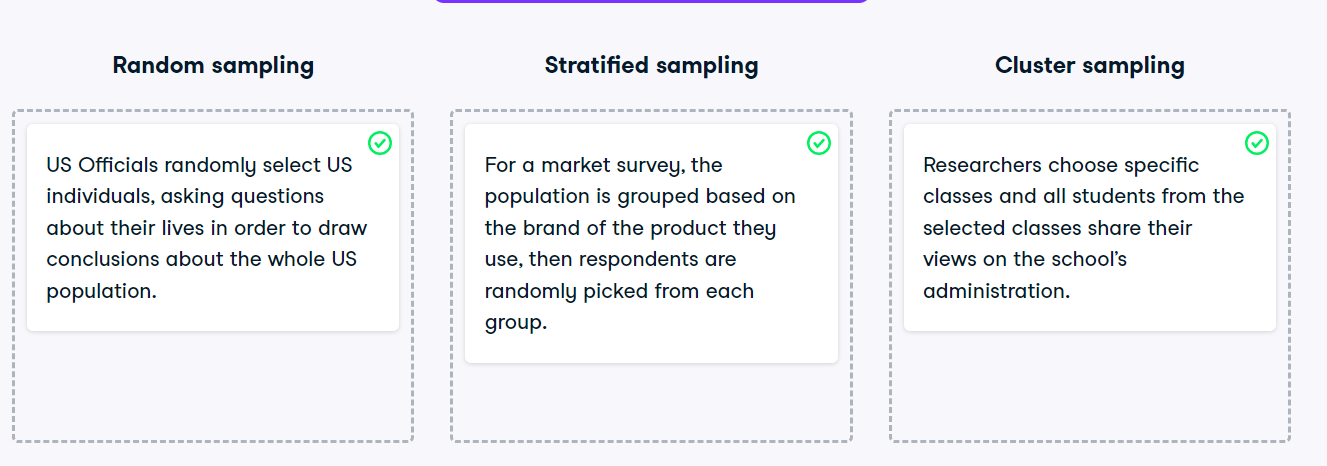

Random sample of employees

In [ ]:
# Use n parameter to sample 85 employees
employee_satisfaction.sample(n = 85)

In [ ]:
# Use n parameter to sample 85 employees
employee_satisfaction.sample(n = 85)

# Use `frac` parameter to sample 85 employees
employee_satisfaction.sample(frac=85/len(employee_satisfaction))

Reproducible random sampling


In [ ]:
# Create a reproducible sample of 25 employees
employee_satisfaction.sample(n = 25, random_state = 123)

Spread of yes's and no's


In [ ]:
# Create a pie chart to the question of working onsite
ABC_survey.onsite_work.value_counts().plot.pie()
plt.show()

Stratified sampling

In [ ]:
# Calculate the percentage of female and male respondents
print(youth_survey.Gender.value_counts(normalize=True) * 100)

In [ ]:
# Calculate the percentage of female and male respondents
print(youth_survey.Gender.value_counts(normalize=True) * 100)

# Check the percentage of female and male respondents
youth_survey.Gender.value_counts(normalize=True) * 100

# Proportionally sample out 1% of respondents
sample_dataset = youth_survey.groupby(
  "Gender", group_keys = False).apply(
  lambda x: x.sample(frac=0.01))

print(sample_dataset.head())

Blog survey

In [ ]:
# Create a crosstab of male and female handedness
survey_crosstab = pd.crosstab(hand_survey.Gender,hand_survey['Left - right handed'])

# Create a horizontal bar plot of your results
survey_crosstab.plot.barh()
plt.show()

Weighted sampling on handedness


In [ ]:
# Groupby Gender and Handedness
hand_survey = hand_survey.groupby(
  ['Gender','Left - right handed'])[
  'Age'].count().reset_index()

hand_survey.columns = ['Gender','Handedness','Respondents']

# Create new column that calculates the percentage of each respondent type
hand_survey['% total respondents'] = hand_survey.Respondents*100./hand_survey.Respondents.sum()

In [ ]:
hand_survey = hand_survey.groupby(
  ['Gender','Left - right handed'])[
  'Age'].count().reset_index()

hand_survey.columns = ['Gender','Handedness','Respondents']

hand_survey['% total respondents'] = hand_survey.Respondents*100./hand_survey.Respondents.sum()

hand_survey['% of population'] = [5.5,44.5,6.5,43.5]

# Calculate weights for each category
hand_survey['Weight'] = hand_survey['% of population'] / hand_survey['% total respondents']

# Calculate number of weighted respondents
hand_survey['Weighted Respondents'] = hand_survey.Weight * hand_survey.Respondents

print(hand_survey.head())

In [ ]:
hand_survey = hand_survey.groupby(
  ['Gender','Left - right handed'])[
  'Age'].count().reset_index()

hand_survey.columns = ['Gender','Handedness','Respondents']

hand_survey['% total respondents'] = hand_survey.Respondents * 100. / hand_survey.Respondents.sum()

hand_survey['% of population'] = [5.5,44.5,6.5,43.5]

hand_survey['Weight'] = hand_survey['% of population'] / hand_survey['% total respondents']

hand_survey['Weighted Respondents'] = hand_survey.Weight * hand_survey.Respondents

# Plot horizontal bar plot of original and weighted sample of each category
hand_survey[['Gender','Handedness','Respondents','Weighted Respondents']].set_index(['Gender','Handedness']).plot.barh()

Group clusters

In [ ]:
# Group population into clusters and calculate respondents
groups = mh_survey.groupby('US_state_live')['gender'].count().reset_index()
groups.columns = ['US_state_live','count']

# Plot a bar graph of number of respondents by US_state_live
groups.plot.bar(x='US_state_live',y='count')
plt.show()

Choosing clusters

In [ ]:
# Create a list of the unique states present in the survey
unique_states = list(set(mh_survey.US_state_live))

# Randomly choose ten states
random_clusters = np.random.choice(unique_states, size = 10, replace = False)

print(random_clusters)

Cluster sampling analysis

In [ ]:
# Subset dataset to inlude only states in cluster_sample
cluster_sample = mh_survey[mh_survey.US_state_live.isin(random_clusters)]

# Create a pie chart of the sought_treament column
treatment_pie = cluster_sample.sought_treatment.value_counts(normalize=True)
treatment_pie.plot.pie()
plt.show()

Frequency distribution

In [ ]:
# Count the number of responses for each age group
freq_dist = dietary_habits.Age.value_counts().to_frame('Number')
print(freq_dist)

In [ ]:
# Count the number of responses for each age group
freq_dist = dietary_habits.Age.value_counts().to_frame('Number')

# Create a bar chart of the different age groups
freq_dist.plot(kind='bar')
plt.show()

Measures of variability

In [ ]:
# Find the range of meals eaten out or ordered
range_value = dietary_habits.eat_out_per_wk.max() - dietary_habits.eat_out_per_wk.min()
print(range_value)

# Find the standard deviation of meals eaten out or ordered
std_dev_value = dietary_habits.eat_out_per_wk.std()
print(std_dev_value)

Measures of central tendency

In [ ]:
# Calculate the mean
mean_value = dietary_habits.eat_out_per_wk.mean()
print('mean_value = ', mean_value)

# Calculate the median
median_value = dietary_habits.eat_out_per_wk.median()
print('median_value = ', median_value)

# Calculate the mode
mode_value = dietary_habits.eat_out_per_wk.mode()
print('mode_value = ', mode_value)

Visualize data: histogram

In [ ]:
# Histogram of Height column
young_people.Height.plot(kind='hist')
plt.show()

Find the z-score

In [ ]:
# z-score of `Height` column
young_people['Height_zscore'] = stats.zscore(young_people.Height)

# Outliers in `Height_zscore`
height_outliers = young_people[
  (young_people.Height_zscore>=3)
  |(young_people.Height_zscore<=-3)
]
print(height_outliers)

Analyze variables with .corr()

In [ ]:
# Find the correlation between variables present in the survey
cor = birth_survey.birth_age.corr(birth_survey.birth_weight)
print(cor)

Are employees happy?

In [ ]:
2

Fair and square

In [ ]:
# z-score of `Age` column
young_people['Age_zscore'] = stats.zscore(young_people.Age)

# Outliers in `Age_zscore`
age_outliers = young_people[
  (young_people.Age_zscore >= 3)
  |(young_people.Age_zscore <= -3)
]
print(age_outliers)

Fitting a linear regression model

In [ ]:
# Define variable, x and y
x = salary_survey.experience_years.tolist()
y = salary_survey.current_salary.tolist()

# Add the constant term
x = sm.add_constant(x)

# Perform .OLS() regression and fit
result = sm.OLS(y,x).fit()

# Print the summary table
print(result.summary())

Visualizing survey data

In [ ]:
# Plot the original values using a scatter plot
x = data.experience_years.tolist()
y = data.current_salary.tolist()
plt.scatter(x,y)

# Get the range of data
max_x = data.experience_years.max()
min_x = data.experience_years.min()

# Get the range of values
x = np.arange(min_x,max_x,1)
y = 1590.4569 * x + 58080

# Plot the regression line
plt.plot(x, y,'r')
plt.show()

Safety precautions needed?

In [ ]:
# Define variable, x and y
x = foot_traffic.year.tolist()
y = foot_traffic.visitors.tolist()

# Add the constant term
x = sm.add_constant(x)

# Perform .OLS() regression and fit
result = sm.OLS(y,x).fit()

# Print the summary table
print(result.summary())

In [ ]:
# Plot the original values using a scatter plot
x = foot_traffic.year.tolist()
y = foot_traffic.visitors.tolist()
plt.scatter(x,y)

max_x = foot_traffic.year.max()
min_x = foot_traffic.year.min()

# Get the range of values
x = np.arange(min_x,max_x,1)
y = 5.9786 * x - 11840

# Plot the regression line
plt.plot(x, y,'r')
plt.show()

In [ ]:
1

Are women more extroverted?

In [ ]:
# Calculate mean extroversion of males
male_mean = male_survey.extroversion.mean()
print(male_mean)

# Calculate mean extroversion of females
female_mean = female_survey.extroversion.mean()
print(female_mean)

In [ ]:
# Calculate mean extroversion of males
male_mean = male_survey.extroversion.mean()

# Calculate mean extroversion of females
female_mean = female_survey.extroversion.mean()

# Test normality for males
male_norm = stats.shapiro(male_survey.extroversion)
print(male_norm)

# Test normality for females
female_norm = stats.shapiro(female_survey.extroversion)
print(female_norm)

In [ ]:
# Calculate mean extroversion of males
male_mean = male_survey.extroversion.mean()

# Calculate mean extroversion of females
female_mean = female_survey.extroversion.mean()

# Test normality for males
male_norm = stats.shapiro(male_survey.extroversion)

# Test normality for females
female_norm = stats.shapiro(female_survey.extroversion)

# Test of equal variance
variance_test = stats.levene(male_survey.extroversion,female_survey.extroversion)
print(variance_test)

Two sample t-test on extraversion

In [ ]:
3

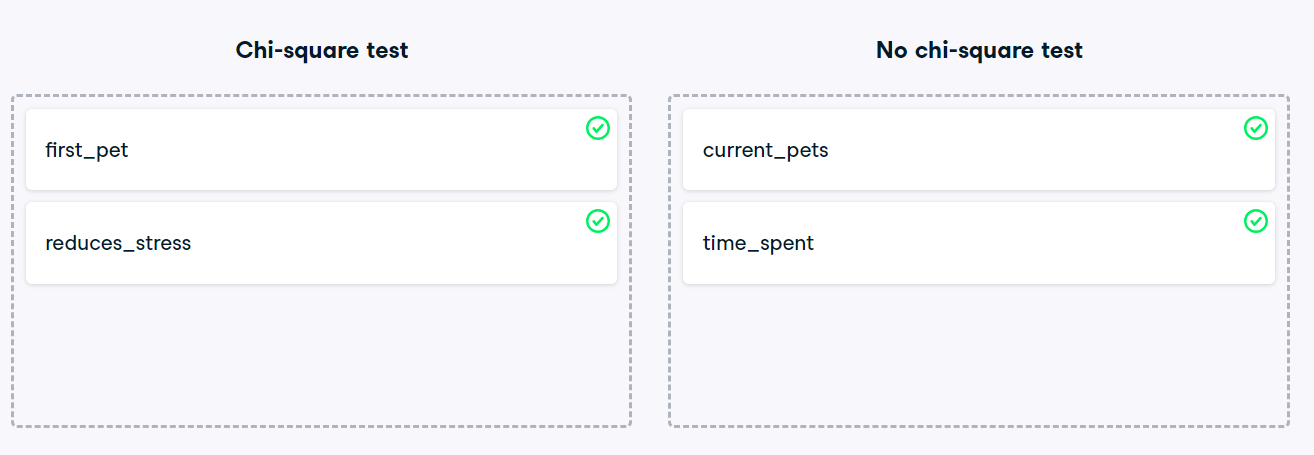

Mental health in tech survey

In [ ]:
# Perform cross tabulation and assign to variable, cross_table
cross_table = pd.crosstab(tech_mh.anonymity_protected, tech_mh.discuss_with_supervisor)

print(cross_table)

In [ ]:
from scipy.stats import chi2_contingency

# Perform cross tabulation and assign to variable, cross_table
cross_table = pd.crosstab(tech_mh.anonymity_protected, tech_mh.discuss_with_supervisor)

# Conduct the chi-square analysis
chi_analysis = chi2_contingency(cross_table)

print(chi_analysis)


Mental health vs. remote work

In [ ]:
# Perform cross tabulation and assign to variable, cross_table
cross_table = pd.crosstab(tech_mh.work_remotely, tech_mh.current_condition)

# Conduct chi-square analysis
chi_analysis = st.chi2_contingency(cross_table)

print(chi_analysis)

In [ ]:
from scipy.stats import chi2_contingency

# Perform cross tabulation and assign to variable, cross_table
cross_table = pd.crosstab(tech_mh.work_remotely, tech_mh.current_condition)

# Conduct chi-square analysis
chi_analysis = chi2_contingency(cross_table)

# Record p-value and expected frequencies
p_value = chi_analysis[1]
expected_freq = chi_analysis[3]

print(p_value)
print(expected_freq)


In [ ]:
1